# Flow Constrictions on Upper Rainy River

In [1]:
# Styles
from IPython.core.display import HTML
HTML(open("styles/custom.css", "r").read())

In [2]:
%%capture capt
%run -i Water_Survey_of_Canada.ipynb

In [3]:
from IPython.display import Image
from IPython.core.display import display

ranierLevelStations = ['05PB007','05PC024','05PC025']
ranierFlowStations = ['05PC019']

levelLocs = ["{0},{1}".format(STATIONS.ix[s,'LATITUDE'], \
    STATIONS.ix[s,'LONGITUDE']) for s in ranierLevelStations]
levelMarkers = "&markers=color:red%7Csize:mid%7C" + "|".join(levelLocs)

flowLocs = ["{0},{1}".format(STATIONS.ix[s,'LATITUDE'], \
    STATIONS.ix[s,'LONGITUDE']) for s in ranierFlowStations]
flowMarkers = "&markers=color:green%7Csize:mid%7C" + "|".join(flowLocs)

google_maps_url = "https://maps.googleapis.com/maps/api/staticmap?" + \
    "size=640x300&maptype=terrain"
    
Image(url = google_maps_url + levelMarkers + flowMarkers)

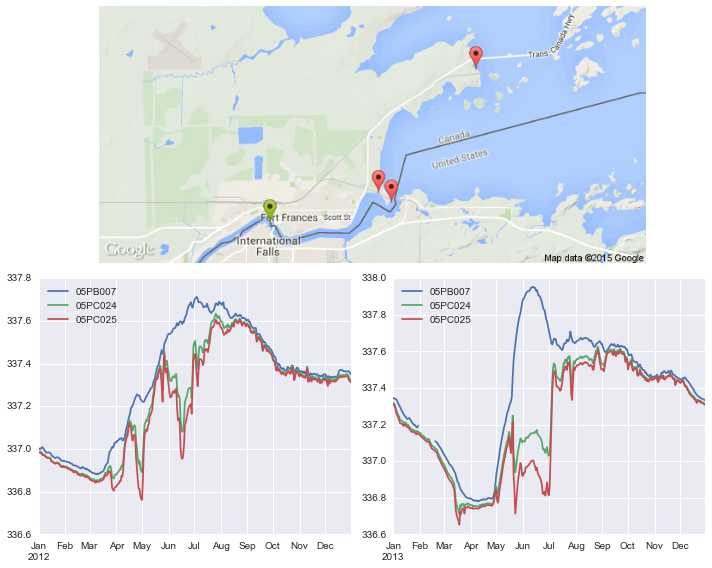

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import urllib
urllib.urlretrieve(google_maps_url + levelMarkers + flowMarkers,'images/RRMap.png')

img=mpimg.imread('images/RRMap.png')

plt.figure(figsize=(10,8))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 2, height_ratios=[1,1])
ax1 = plt.subplot(gs[0,:])

fig = ax1.imshow(img)
fig.set_cmap('hot')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

def ranier(y,ax):
    plt.hold(True)
    for r in ranierLevelStations:
        lvl = getLevelsWSC(r)
        lvl[lvl.index.year==y].plot()
    ax.legend(ranierLevelStations,loc='upper left')
    plt.hold(False)

ranier(2012,plt.subplot(gs[1,0]))
ranier(2013,plt.subplot(gs[1,1]))

plt.tight_layout()

fname = './images/RainyRiverConstrictions.png'

plt.savefig(fname)
!convert $fname -trim $fname